In [6]:
import os # Ensure the script runs in the correct directory (not in demo)
os.chdir('/home/negreami/project/mmsegmentation')

# Download checkpoint and remember its path
checkpoint_url = "https://download.openmmlab.com/mmsegmentation/v0.5/deeplabv3/deeplabv3_r50-d8_512x1024_40k_cityscapes/deeplabv3_r50-d8_512x1024_40k_cityscapes_20200605_022449-acadc2f8.pth"
checkpoint_dir = "checkpoints"
checkpoint_file = os.path.join(checkpoint_dir, os.path.basename(checkpoint_url))

# Check if the checkpoint file already exists. If not, download it.
if not os.path.exists(checkpoint_file):
    os.makedirs(checkpoint_dir, exist_ok=True)
    os.system(f"wget {checkpoint_url} -P {checkpoint_dir}")

--2025-07-07 20:12:07--  https://download.openmmlab.com/mmsegmentation/v0.5/deeplabv3/deeplabv3_r50-d8_512x1024_40k_cityscapes/deeplabv3_r50-d8_512x1024_40k_cityscapes_20200605_022449-acadc2f8.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 163.181.254.192, 163.181.254.190, 163.181.254.194, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|163.181.254.192|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272761181 (260M) [application/octet-stream]
Saving to: ‘checkpoints/deeplabv3_r50-d8_512x1024_40k_cityscapes_20200605_022449-acadc2f8.pth’

     0K .......... .......... .......... .......... ..........  0% 5.74M 45s
    50K .......... .......... .......... .......... ..........  0% 9.65M 36s
   100K .......... .......... .......... .......... ..........  0% 11.6M 32s
   150K .......... .......... .......... .......... ..........  0% 7.96M 32s
   200K .......... .......... .......... .......... ..........  0% 10.9M 30s
   250K ..

In [2]:
import mmcv
from mmseg.apis import (
    init_segmentor,       # function that loads a model from a config file and a checkpoint file
    inference_segmentor,  # function that takes an image and a model and returns the segmentation results
    show_result_pyplot,   # visualization
)

/home/negreami/miniconda3/envs/aisenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/negreami/miniconda3/envs/aisenv/lib/python3.10/site-packages/torch/utils/cpp_extension.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import packaging  # type: ignore[attr-defined]


In [3]:
# the config file sits in the configs directory of the mmsegmentation repo
config_file = 'configs/deeplabv3/deeplabv3_r50-d8_512x1024_40k_cityscapes.py'

# the checkpoint is downloaded from the link above
checkpoint_file = 'checkpoints/deeplabv3_r50-d8_512x1024_40k_cityscapes_20200605_022449-acadc2f8.pth'

/home/negreami/project/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


load checkpoint from local path: checkpoints/deeplabv3_r50-d8_512x1024_40k_cityscapes_20200605_022449-acadc2f8.pth


/home/negreami/project/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


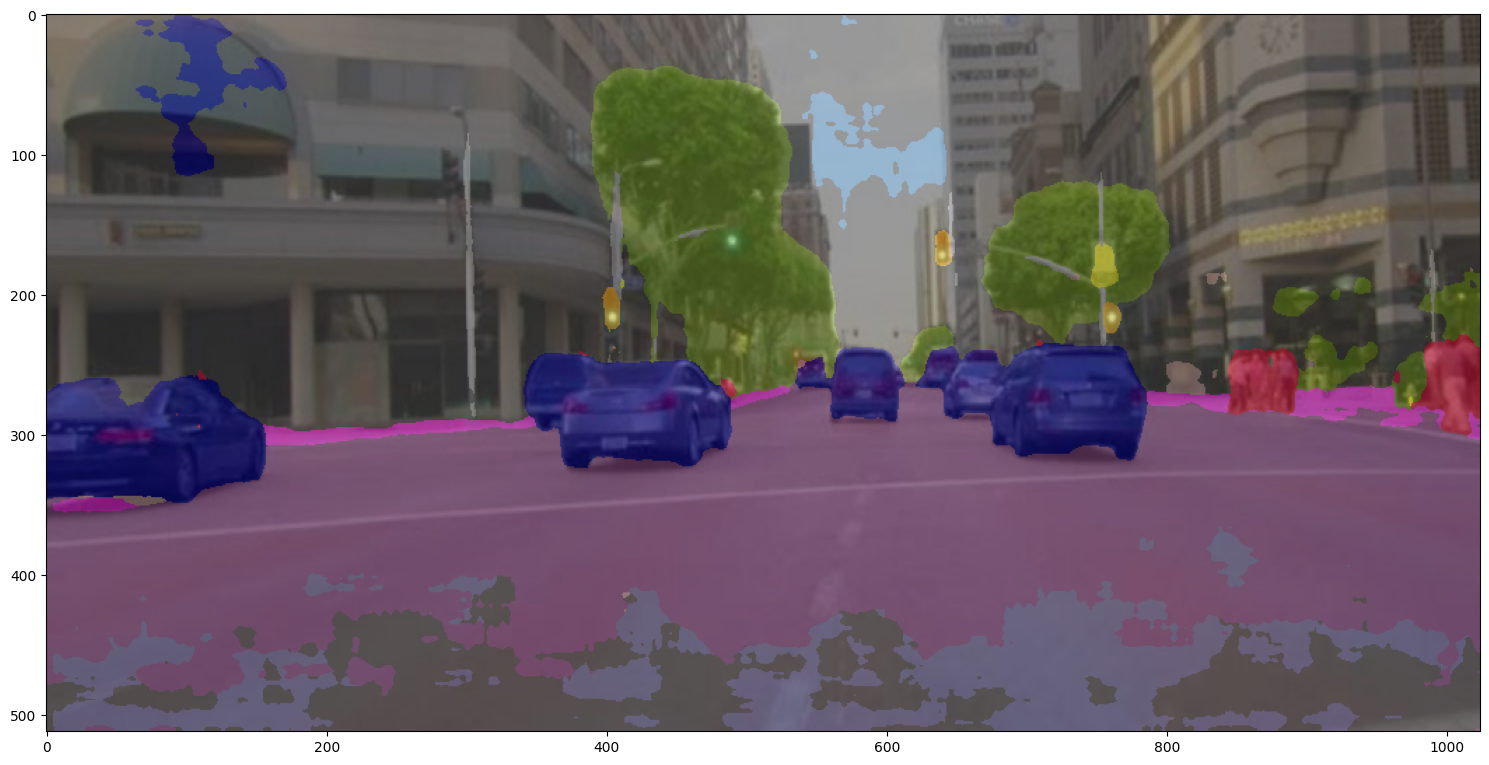

In [4]:
# initialize model from config file and checkpoint file
model = init_segmentor(config_file, checkpoint_file, device='cuda:0')

# select an image
img = 'demo/demo_images/cars.png'  # any image, preferably of a cityscape

# give the model that image and get a segmentation result
result = inference_segmentor(model, img)

# visualize the result
show_result_pyplot(model, img, result, model.PALETTE)

In [5]:
# Clean up the checkpoint file at the end
if os.path.exists(checkpoint_file):
    os.remove(checkpoint_file)
    print(f"Deleted checkpoint: {checkpoint_file}")

Deleted checkpoint: checkpoints/deeplabv3_r50-d8_512x1024_40k_cityscapes_20200605_022449-acadc2f8.pth
